In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
data = load_breast_cancer()
X = data.data 
y = data.target

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Plain Logistic

## GD

Coefficients:  [-0.15430505 -0.10801291 -0.15599533 -0.14697755 -0.06685218 -0.10640828
 -0.13529758 -0.15908196 -0.05872945  0.02878265 -0.10528708  0.00772271
 -0.09907395 -0.1000095   0.01996679 -0.02790655 -0.0211663  -0.05323904
  0.00500556  0.02372561 -0.1670594  -0.1233514  -0.16639307 -0.15364095
 -0.09269259 -0.12051312 -0.14000036 -0.16553565 -0.10434053 -0.05506455]


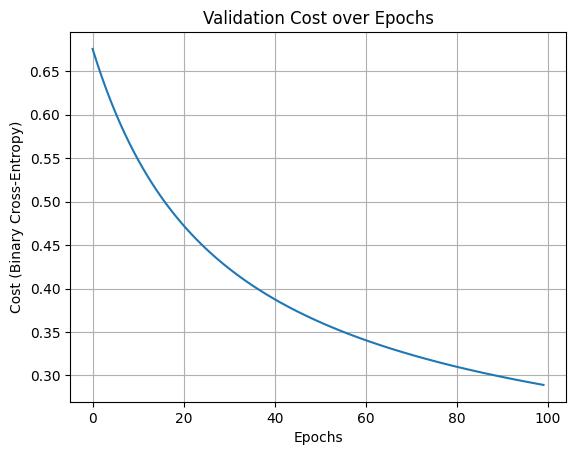

Confusion Matrix before Training on Validation:
[[ 0 36]
 [ 0 55]]
Initial validation accuracy before training: 0.6044

Confusion Matrix after Training on Validation Set:
[[33  3]
 [ 4 51]]
Final Validation Accuracy: 0.9231


In [3]:
# Sigmoid function and cost function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    predictions = sigmoid(X @ weights)
    cost = -np.mean(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))
    return cost
    
def binary_cross_entropy(predictions, targets):
    predictions = np.clip(predictions, 1e-9, 1 - 1e-9)  # Avoid log(0)
    return -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))


# Logistic Regression with Gradient Descent
def logistic_regression_gd(X, y, X_val, y_val, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    cost_history = []

    for epoch in range(epochs):
        predictions = sigmoid(X @ weights)
        gradient = (1 / n_samples) * (X.T @ (predictions - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X_val, y_val, weights)
        cost_history.append(cost)

    return weights, cost_history

# Logistic Regression training
learning_rate = 0.01
epochs = 100
weights, cost_history = logistic_regression_gd(X_train, y_train, X_val, y_val, learning_rate, epochs)

print("Coefficients: ",weights)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

## SGD true

Coefficients:  [-0.53891667 -1.00856455 -0.53753402 -0.89604579 -0.0183152   0.4816883
 -1.43555057 -1.31820948 -0.0368977   0.11172493 -1.67759767  0.76024848
 -1.14712257 -1.49778724 -0.5557258   1.14487991 -0.07017235  0.27416788
  0.55236799  0.58653732 -1.21560163 -1.82073495 -0.97378161 -1.48716968
 -1.00809363  0.04460037 -1.33145224 -0.87831779 -1.43922021 -0.24225153]


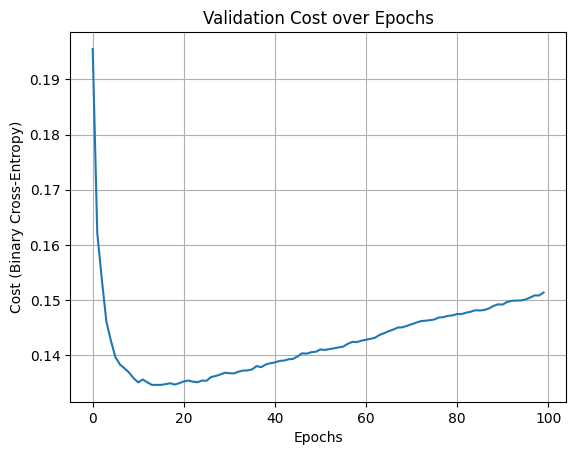

Confusion Matrix before Training on Validation:
[[ 0 36]
 [ 0 55]]
Initial validation accuracy before training: 0.6044

Confusion Matrix after Training on Validation Set:
[[34  2]
 [ 1 54]]
Final Validation Accuracy: 0.9670


In [4]:
def logistic_regression_sgd(X, y,X_val, y_val, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(n_samples):
            # Single data point
            X_i = X_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]

            z = X_i @ weights
            predictions = sigmoid(z)

            # Compute gradient for the single sample
            gradient = X_i.T * (predictions - y_i)

            # Update weights
            weights -= learning_rate * gradient.flatten()  # flatten to make it 1D

        # Record cost after each epoch
        cost = compute_cost(X_val, y_val, weights)
        cost_history.append(cost)

    return weights, cost_history

learning_rate = 0.01
epochs = 100
weights, cost_history = logistic_regression_sgd(X_train, y_train, X_val, y_val,learning_rate, epochs)

print("Coefficients: ",weights)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

In [5]:
# TEST
final_predictions_test = sigmoid(X_test @ weights) >= 0.5
final_conf_matrix_test = confusion_matrix(y_test, final_predictions_test)
final_accuracy_test = accuracy_score(y_test, final_predictions_test)
print("\nConfusion Matrix after Training on Test Set:")
print(final_conf_matrix_test)
print(f"Final Test Accuracy: {final_accuracy_test:.4f}")


Confusion Matrix after Training on Test Set:
[[43  0]
 [71  0]]
Final Test Accuracy: 0.3772


/tmp/ipykernel_148121/910278603.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## SGD minibatch

Coefficients:  [-0.40286879 -0.40593757 -0.40236437 -0.413961   -0.1309095  -0.15370729
 -0.36083465 -0.42930306 -0.09965848  0.15302716 -0.350581    0.01028023
 -0.29750239 -0.33303718 -0.03016401  0.09896469  0.05520685 -0.00847653
  0.03465777  0.19776085 -0.47782445 -0.47581623 -0.45788339 -0.4661695
 -0.3103122  -0.24795566 -0.36629151 -0.41116591 -0.34314691 -0.11336174]


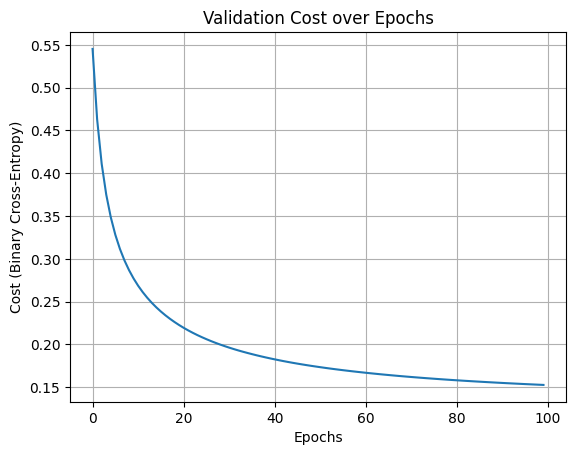

Confusion Matrix before Training on Validation:
[[ 0 36]
 [ 0 55]]
Initial validation accuracy before training: 0.6044

Confusion Matrix after Training on Validation Set:
[[34  2]
 [ 2 53]]
Final Validation Accuracy: 0.9560


In [6]:
def logistic_regression_mgd(X, y, X_val, y_val, learning_rate=0.01, epochs=100, batch_size=32):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start_idx in range(0, n_samples, batch_size):
            X_batch = X_shuffled[start_idx:start_idx + batch_size]
            y_batch = y_shuffled[start_idx:start_idx + batch_size]

            z = X_batch @ weights
            predictions = sigmoid(z)

            # Compute gradient
            gradient = (1 / batch_size) * (X_batch.T @ (predictions - y_batch))

            # Update weights
            weights -= learning_rate * gradient

        # Record cost
        cost = compute_cost(X_val, y_val, weights)
        cost_history.append(cost)

    return weights, cost_history

learning_rate = 0.01
epochs = 100
weights, cost_history = logistic_regression_mgd(X_train, y_train, X_val, y_val, learning_rate, epochs)

print("Coefficients: ",weights)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

## SGD Scikit-Learn

In [7]:
sklearn_log_reg = LogisticRegression(penalty=None, solver='sag', max_iter=100)
sklearn_log_reg.fit(X_train, y_train)

print("Coefficients: ",sklearn_log_reg.coef_)

# Predictions and evaluation
final_predictions_val = sklearn_log_reg.predict(X_val)
accuracy_sklearn = accuracy_score(y_val, final_predictions_val)

print("Accuracy with scikit-learn Logistic Regression:", accuracy_sklearn)

# Confusion matrix
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
print("\nFinal Confusion Matrix on Validation set:")
print(final_conf_matrix_val)

Coefficients:  [[-0.71837936 -1.09207826 -0.70082346 -0.80240949 -0.15598498  0.37742288
  -1.20397206 -1.20875233 -0.01340483  0.41665977 -1.54690903  0.71253245
  -1.09124098 -1.17532895 -0.44623132  0.99649475 -0.13715633 -0.18913952
   0.80876007  0.96854493 -1.17117199 -1.87756169 -0.9388915  -1.16180617
  -0.97211322 -0.12538916 -1.44220297 -1.04803716 -1.62491854 -0.06246018]]
Accuracy with scikit-learn Logistic Regression: 0.967032967032967

Final Confusion Matrix on Validation set:
[[34  2]
 [ 1 54]]


/home/laura/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# RIDGE

In [8]:
def compute_cost_Ridge(X, y, weights, l2_lambda=0.0):
    # Calculate predictions
    z = X @ weights
    predictions = sigmoid(z)
    # Cost with L2 regularization
    cost = binary_cross_entropy(predictions, y) + (l2_lambda / 2) * np.sum(weights[1:] ** 2)
    return cost

## GD

Coefficients:  [-0.15756257 -0.10093184 -0.14569646 -0.13719296 -0.06290726 -0.09997564
 -0.12682183 -0.1489008  -0.05532563  0.02628545 -0.09834967  0.00710877
 -0.09256812 -0.09331598  0.01850167 -0.02669257 -0.02041686 -0.05033819
  0.00447481  0.02149085 -0.15603544 -0.11529485 -0.15545251 -0.14344314
 -0.08700036 -0.11313244 -0.13131228 -0.15506288 -0.09779732 -0.0520707 ]


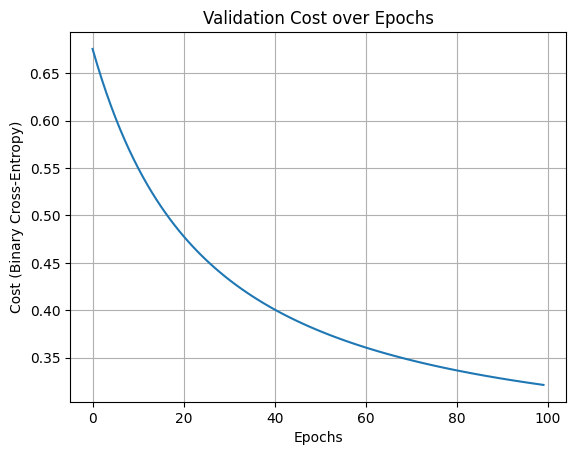

Confusion Matrix before Training on Validation:
[[ 0 36]
 [ 0 55]]
Initial validation accuracy before training: 0.6044

Confusion Matrix after Training on Validation Set:
[[33  3]
 [ 4 51]]
Final Validation Accuracy: 0.9231


In [9]:
def logistic_gd_Ridge(X, y, X_val, y_val, learning_rate=0.01, epochs=100, l2_lambda=0.01):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    for epoch in range(epochs):
        # Compute predictions
        z = X @ weights
        predictions = sigmoid(z)

        # Gradient of cost function with L2 regularization
        gradient = (1 / n_samples) * (X.T @ (predictions - y)) + l2_lambda * np.r_[0, weights[1:]]

        # Update weights
        weights -= learning_rate * gradient

        # Record cost for monitoring
        cost = compute_cost_Ridge(X_val, y_val, weights, l2_lambda)
        cost_history.append(cost)

    return weights, cost_history

lmbda=0.15
learning_rate = 0.01
epochs = 100
weights, cost_history = logistic_gd_Ridge(X_train, y_train, X_val, y_val, learning_rate, epochs, lmbda)

print("Coefficients: ",weights)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

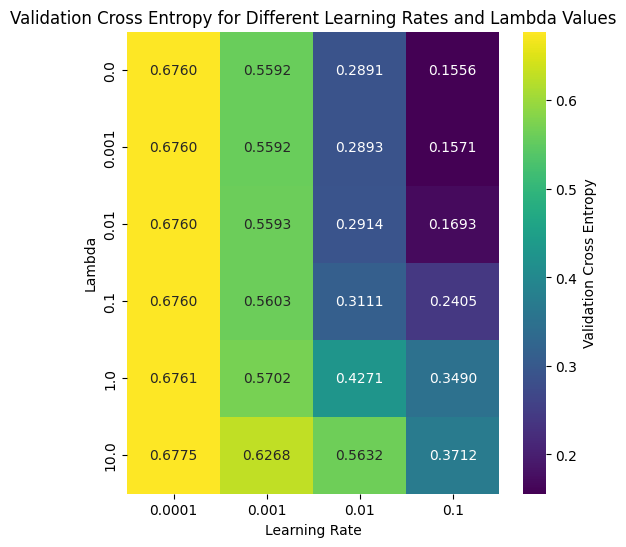

In [10]:
# lambda and learning rate
lambda_values = [0.0, 0.001, 0.01, 0.1, 1, 10]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

results = []
epochs = 100
for lambda_reg in lambda_values:
    for lr in learning_rates:
        
        weights, cost_history = logistic_gd_Ridge(X_train, y_train, X_val, y_val, lr, epochs, lambda_reg)

        final_loss = cost_history[-1]
        results.append((lambda_reg, lr, final_loss))

# results stored into DataFrame 
results_df = pd.DataFrame(results, columns=['lambda', 'learning_rate', 'cross_entropy'])
heatmap_data = results_df.pivot(index="lambda", columns="learning_rate", values="cross_entropy")

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Validation Cross Entropy'})
plt.title("Validation Cross Entropy for Different Learning Rates and Lambda Values")
plt.xlabel("Learning Rate")
plt.ylabel("Lambda")
plt.show()

## SGD

Coefficients:  [-1.40040632 -0.5768713  -0.23370044 -0.3958236  -0.07501527  0.13175656
 -0.66464126 -0.61607486 -0.07367431  0.04489941 -0.74462808  0.17652244
 -0.53242483 -0.66617041 -0.25105886  0.43700711 -0.00202838  0.13291248
  0.12001745  0.24060606 -0.52835706 -0.85984406 -0.44259589 -0.65813567
 -0.57162906 -0.11083737 -0.62336687 -0.44246134 -0.67635097 -0.22468598]


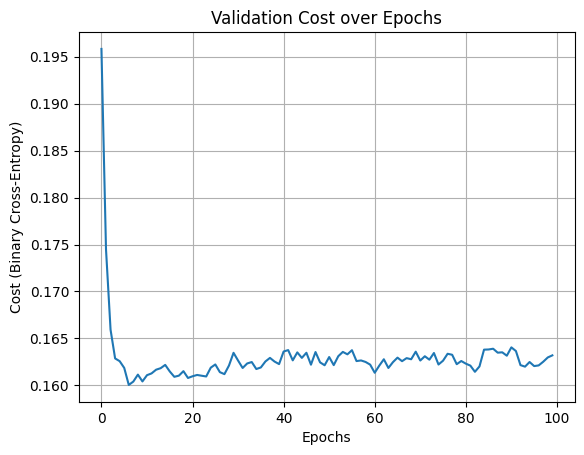

Confusion Matrix before Training on Validation:
[[ 0 36]
 [ 0 55]]
Initial Validation accuracy before training: 0.6044

Confusion Matrix after Training on Validation Set:
[[34  2]
 [ 1 54]]
Final Validation Accuracy: 0.9670


In [11]:
def logistic_sgd_Ridge(X, y, X_val, y_val, learning_rate=0.01, epochs=100, l2_lambda=0.0):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(n_samples):
            # Single data point
            X_i = X_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]

            z = X_i @ weights
            predictions = sigmoid(z)

            # Compute gradient for the single sample
            gradient = (X_i.T @ (predictions - y_i)) + l2_lambda * np.r_[0, weights[1:]]

            # Update weights
            weights -= learning_rate * gradient.flatten()  # flatten to make it 1D

        # Record cost after each epoch
        cost = compute_cost_Ridge(X_val, y_val, weights, l2_lambda)
        cost_history.append(cost)

    return weights, cost_history

learning_rate = 0.01
epochs = 100
lmbda=0.01
weights, cost_history = logistic_sgd_Ridge(X_train, y_train, X_val, y_val, learning_rate, epochs,lmbda)

print("Coefficients: ",weights)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial Validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

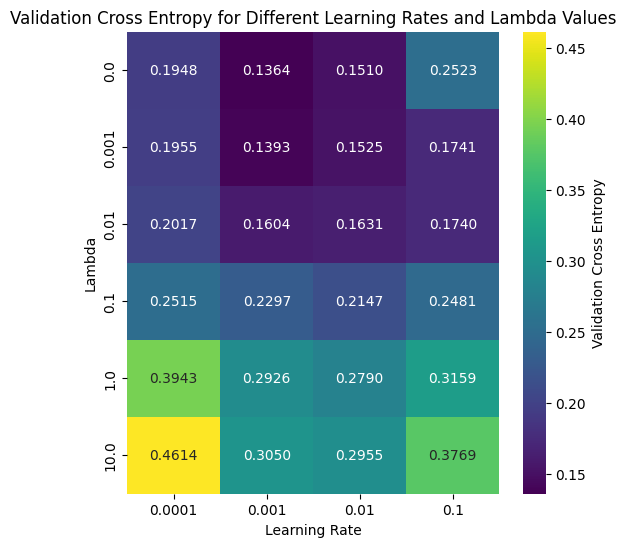

In [12]:
lambda_values = [0.0, 0.001, 0.01, 0.1, 1, 10]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# lambda e learning rate
results = []
epochs = 100
for lambda_reg in lambda_values:
    for lr in learning_rates:
        
        weights, cost_history = logistic_sgd_Ridge(X_train, y_train, X_val, y_val, lr, epochs, lambda_reg)

        final_loss = cost_history[-1]
        results.append((lambda_reg, lr, final_loss))

results_df = pd.DataFrame(results, columns=['lambda', 'learning_rate', 'cross_entropy'])
heatmap_data = results_df.pivot(index="lambda", columns="learning_rate", values="cross_entropy")

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Validation Cross Entropy'})
plt.title("Validation Cross Entropy for Different Learning Rates and Lambda Values")
plt.xlabel("Learning Rate")
plt.ylabel("Lambda")
plt.show()

## MGD

Coefficients:  [-0.40394283 -0.4033876  -0.3998663  -0.41142567 -0.13004153 -0.15312863
 -0.35913174 -0.42711674 -0.09942534  0.1516545  -0.34881383  0.01024547
 -0.29622997 -0.33126045 -0.0302618   0.09842766  0.05482018 -0.00843304
  0.03444863  0.19663214 -0.47499869 -0.47302191 -0.45523757 -0.46346064
 -0.30868287 -0.2466745  -0.36451888 -0.40905894 -0.34124262 -0.11292455]


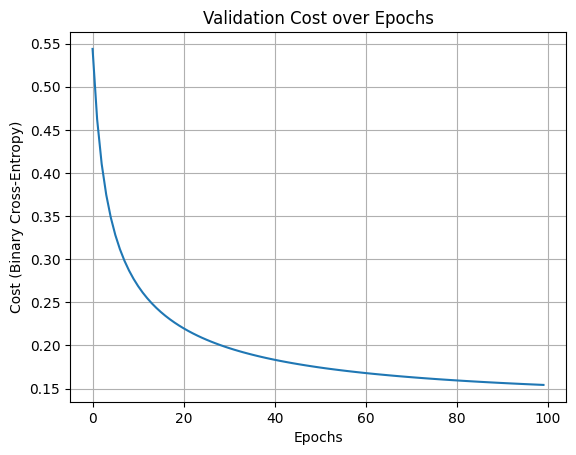

Confusion Matrix before Training on Validation:
[[ 0 36]
 [ 0 55]]
Initial Validation accuracy before training: 0.6044

Confusion Matrix after Training on Validation Set:
[[34  2]
 [ 2 53]]
Final Validation Accuracy: 0.9560


In [13]:
def logistic_mgd_Ridge(X, y, X_val, y_val, learning_rate=0.01, epochs=100, batch_size=32, l2_lambda=0.01):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    accuracy_history = []
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start_idx in range(0, n_samples, batch_size):
            X_batch = X_shuffled[start_idx:start_idx + batch_size]
            y_batch = y_shuffled[start_idx:start_idx + batch_size]

            z = X_batch @ weights
            predictions = sigmoid(z)

            # Compute gradient with L2 regularization
            gradient = (1 / batch_size) * (X_batch.T @ (predictions - y_batch)) + l2_lambda * np.r_[0, weights[1:]]

            # Update weights
            weights -= learning_rate * gradient

        # Record cost
        cost = compute_cost_Ridge(X_val, y_val, weights, l2_lambda)
        cost_history.append(cost)
        
        predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
        accuracy_history.append(accuracy_score(y_val, predictions))
        

    return weights, cost_history, accuracy_history

batch_size=32
lmbda=0.001
learning_rate = 0.01
epochs = 100
weights, cost_history, accuracy_history = logistic_mgd_Ridge(X_train, y_train, X_val, y_val, learning_rate, epochs, batch_size, lmbda)

print("Coefficients: ",weights)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial Validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

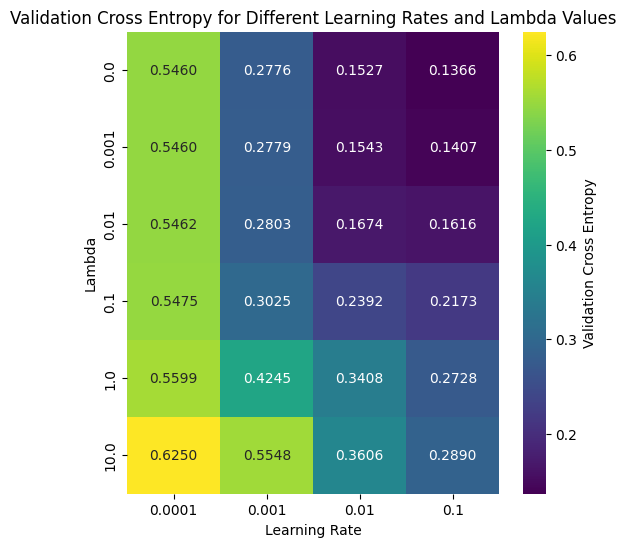

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# lambda e learning rate
lambda_values = [0.0, 0.001, 0.01, 0.1, 1, 10]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

results = []
epochs = 100
for lambda_reg in lambda_values:
    for lr in learning_rates:
        weights, cost_history, _ = logistic_mgd_Ridge(X_train, y_train, X_val, y_val, lr, epochs, batch_size, lambda_reg)

        final_loss = cost_history[-1]
        results.append((lambda_reg, lr, final_loss))

results_df = pd.DataFrame(results, columns=['lambda', 'learning_rate', 'cross_entropy'])

heatmap_data = results_df.pivot(index="lambda", columns="learning_rate", values="cross_entropy")

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Validation Cross Entropy'})
plt.title("Validation Cross Entropy for Different Learning Rates and Lambda Values")
plt.xlabel("Learning Rate")
plt.ylabel("Lambda")
plt.show()

## Scikit-Learn

In [15]:
l2_lambda = 0.01
sklearn_log_reg = LogisticRegression(penalty='l2', C=1/l2_lambda, solver='saga', max_iter=100)
sklearn_log_reg.fit(X_train, y_train)

print("Coefficients: ", sklearn_log_reg.coef_)

# Predictions and evaluation
final_predictions_val = sklearn_log_reg.predict(X_val)
accuracy_sklearn = accuracy_score(y_val, final_predictions_val)

print("Accuracy with scikit-learn Logistic Regression:", accuracy_sklearn)

# Confusion matrix
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
print("\nFinal Confusion Matrix on validation set:")
print(final_conf_matrix_val)

Coefficients:  [[-0.69708384 -1.00506941 -0.68116762 -0.75284467 -0.17066906  0.17803969
  -0.96959375 -0.97142455 -0.05767932  0.39951529 -1.15566377  0.41527469
  -0.81098326 -0.90678076 -0.29307022  0.78162831 -0.07643485 -0.09795978
   0.52125073  0.66957484 -0.98737321 -1.43366375 -0.82876767 -0.97282966
  -0.83062876 -0.18221049 -1.09515053 -0.84090631 -1.17284088 -0.12780118]]
Accuracy with scikit-learn Logistic Regression: 0.967032967032967

Final Confusion Matrix on validation set:
[[34  2]
 [ 1 54]]


/home/laura/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [16]:
# Test
final_predictions_test = sklearn_log_reg.predict(X_test)
final_acc_test = accuracy_score(y_test, final_predictions_test)
print(f'\nFinal accuracy on Test set after training: {final_acc_test:.4f}')

# Confusion matrix 
final_conf_matrix_test = confusion_matrix(y_test, final_predictions_test)
print("\nFinal Confusion Matrix on Test set:")
print(final_conf_matrix_test)


Final accuracy on Test set after training: 0.3772

Final Confusion Matrix on Test set:
[[43  0]
 [71  0]]
